Suppose you define a function $f(x,y)$, and you need its partial derivatives $\frac{\partial f}{\partial x}$ and $\frac{\partial f}{\partial y}$, typically to perform Gradient Descent (or some other optimization algorithm). 

Your main options are:
1. Manual differentiation;
2. Symbolic differentiation;
3. Numerical differentiation;
4. forward-mode autodiff;
5. revers-mode autodiff.


### **Recall the Chain Rule**

For the simple composition
\begin{align}
& y=f(g(h(x)))=f(g(h(w_0)))=f(g(w_1))=f(w_2)=w_3 \\
& w_0=x \\
& w_1=h(w_0)\\
& w_2=g(w_1)\\
& w_3=f(w_2)=y\\
\end{align}

the chain rule gives
\begin{align}
\frac{\partial y}{\partial x}=\frac{\partial y}{\partial w_2}\frac{\partial w_2}{\partial w_1}\frac{\partial w_1}{\partial x}=\frac{\partial f(w_2)}{\partial w_2}\frac{\partial g(w_1)}{\partial w_1}\frac{\partial h(w_0)}{\partial x}
\end{align}

### **Manual Differentiation**

To pick up a pencil and a piece of paper and use calculus knowledge  to derive the partial derivatives manually.

E.g., Partial derivatives of $f(x,y)=x^2y+y+2$

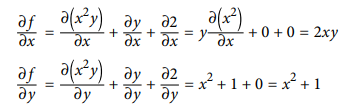


This approach can become very tedious for more complex functions, and you run the risk of making mistakes. 

### **Symbolic Differentiation**

The below figure shows how symbolic differentiation works on an simpler function, $g(x,y)=5+xy$.

Left: The graph for the function $g(x,y)$

Right: The graph for the function after symbolic differentiation $\frac{\partial g}{\partial x}=0+(0×x+y\times1)=y$

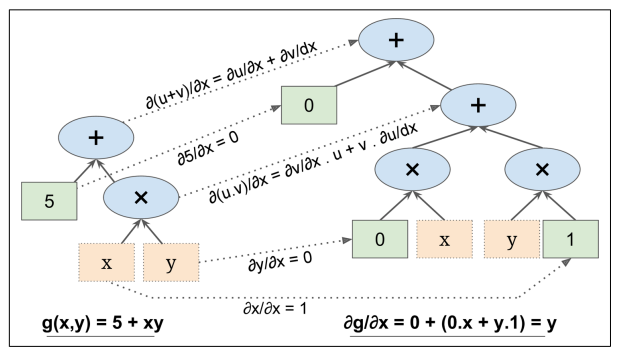

Disadvantages:
1. Can produce a huge graph for a more complex function, and may be tough to simplify and lead to suboptimal performance.
2. Cannot deal with functions defined with arbitrary code (see below code as an example)

In [ ]:
def func(a, b):
  z = 0
  for i in range(100):
    z = a * np.cos(z + i) + z * np.sin(b - i)
  return z

### **Numerical Differentation**

Compute an approximation of the derivatives, numerically. Recall that the derivative $h'(x_0)$ of a function $h(x)$ at a point $x_0$ is the slope of the function at that point.

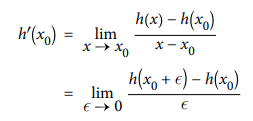

So if we want to calculate the partial derivative of $f(x,y)$ with regards to $x$, at $x=3$ and $y=4$, we can simply compute $f(3+ϵ)-f(3,4)$ and divide the result by $ϵ$, using a very small value for $ϵ$.

Disadvantages:
1. The result is imprecise;
2. It would be very inefficient for functions with a large number of parameters (such as neural networks).

  E.g., Partial derivatives of $f(x,y)=x^2y+y+2$

  To compute both partial derivatives, $\frac{\partial f}{\partial x}$ and $\frac{\partial f}{\partial y}$, we have to call $f()$ at least three times. If there were 1000 parameters, we would need to call $f()$ at least 1001 times.

Still, numerical differentiation is a great tool to check that the other methods are implemented correctly.

# **Autodiff**

### **Dual Numbers**

Numbers of the form $a+bϵ$ where $a$ and $b$ are real numbers and $ϵ$ is an infinitesimal number such that $ϵ^2=0$ (but $ϵ\neq0)$. You can think of the dual number $42+24ϵ$ as something akin to $42.000\cdots000024$ with an infinite number of $0$s (but of course this is simplified just to give you some idea of what dual numbers are). A dual number is represented in memory as pair of floats. For example, $42+24ϵ$ is represented by the pair $(42.0, 24.0)$.

Dual numbers can be added, multiplied and so on.

\begin{align}
& λ(a+bϵ)=λa+λbϵ \\
& (a+b\epsilon)+(c+d\epsilon)=(a+c)+(b+d)ϵ \\
& (a+b\epsilon)\times(c+dϵ)=ac+(ad+bc)ϵ+(bd)ϵ^2=ac+(ad+bc)ϵ
\end{align}

A dual number is an extension of the real numbers.  Written out, the form looks similar to a complex number.

**Review of Complex Numbers**

Recall that a complex number has the form $$z = a + ib$$ where we *define* the number $i$ so that $i^{2} = -1$.

No real number has this property but it is a useful property for a number to have.  Hence the introduction of complex numbers.

Visually, you can think of a real number as a number lying on a straight line.  Then, we "extend" the real line "up".  The new axis is called the *imaginary* axis.

Complex numbers have several properties that we can use.
* Complex conjugate: $z^{*} = a - ib$.
* Magnitude of a complex number: $\left|z\right|^{2} = zz^{*} = \left(a+ib\right)\left(a-ib\right) = a^{2} + b^{2}$.
* Polar form: $z = \left|z\right|\exp\left(i\theta\right)$ where $\displaystyle \theta = \tan^{-1}\left(\dfrac{b}{a}\right)$.

**Towards Dual Numbers**

A dual number has a real part and a dual part.  We write $$z = a + \epsilon b$$ and refer to $b$ as the dual part.

We *define* the number $\epsilon$ so that $\epsilon^{2} = 0$.

**This does not mean that $\epsilon$ is zero!**  $\epsilon$ is not a real number.

Some properties of dual numbers:
* Conjugate:  $z^{*} = a - \epsilon b$.
* Magnitude: $\left|z\right|^{2} = zz^{*} = \left(a+\epsilon b\right)\left(a-\epsilon b\right) = x^{2}$.
* Polar form: $z = a\left(1 + \dfrac{b}{a}\right)$.

### **Forward-Model Autodiff**

Since $h(a+bϵ)=h(a)+b×h'(a)ϵ$, computing $h(a+ϵ)$ gives you both $h(a)$ and the derivative $h'(a)$ in just one shot.

E.g., Partial derivatives of $f(x,y)=x^2y+y+2$

To do: compute $f(3+ϵ,4)$ -> first component $f(3,4)$, second component $\frac{\partial f}{\partial x}(3,4)$.


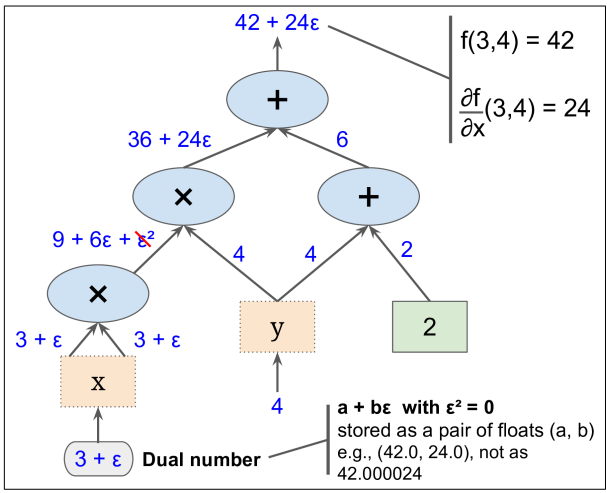

**Forward-Mode Autodiff** vs. **Numerical Differentiation**
Advantage: Forward-Mode Autodiff is much more accurate than numerical differentiation.
Disadvantage: same flaw as Numerical Differentiation. (if 1000 parameters, it would require 1000 passes through the graph to compute all the partial derivatives.)

**Next-> Reverse-Mode Autodiff**

### **Reverse-Mode Autodiff**

The solution implemented by TensorFlow. Can compute all the partial derivatives in just two passes through the graph.

The first pass: it goes through the graph in the forward direction (i.e., from the inputs to the output) to compute the value of each node. 

The second pass: it goes through the graph in the reverse direction (i.e., from the output to the inputs) to compute all the partial derivatives. (rely on the chain rule)

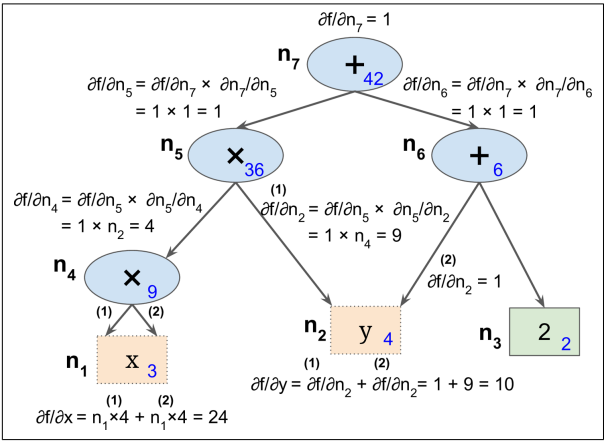

Reverse-mode autodiff: a very powerful and accurate technique, especially when there are many inputs and few outputs.
1. requires only one forward pass plus one reverse pass per output to compute all the partial derivatives for all outputs with regards to all the inputs.
2. can deal with functions defined by arbitrary code.
3. can handle functions that are not entirely differentiable, as long as to compute the partial derivatives at points that are differentiable.

## **Examples**

JAX vs. Autograd vs. Tensorflow/Pytorch

###Making the dataset

In [49]:
from sklearn.datasets import make_blobs
X, y = make_blobs(
    n_samples=500, n_features=2, centers=2, cluster_std=0.5, random_state=0
) 

In [50]:
print(X.shape)
print(y.shape)

(500, 2)
(500,)


In [51]:
import numpy as np
X = np.c_[X, np.ones(500)]

In [52]:
y[y == 0] = -1

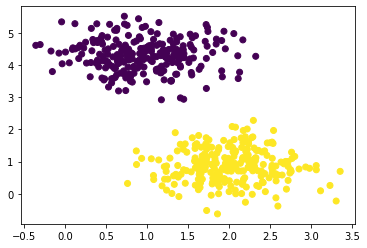

In [53]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)

###Building a linear model

The loss function
\begin{align}
L=\frac{1}{n}\sum_{i=1}^{n}max(0,1-y_i\bar{y_i})
\end{align}

In [54]:
import jax.numpy as jnp

def predict(w, X):
  return jnp.dot(X, w)

In [55]:
def loss(w):
  preds = predict(w, X)
  return jnp.mean(jnp.clip(1 - jnp.multiply(y, preds), a_min=0))

In [56]:
import numpy as np
np.random.seed(0)

w = np.random.randn(3)
print(w.shape)

(3,)


###Gradient descent with automatic differentiation

In [57]:
from jax import grad

loss_grad = grad(loss)

In [58]:
%%time
n_iters = 200
lr = 0.01
loss_grad = grad(loss)

for i in range(n_iters):
  grads = loss_grad(w)
  w = w - lr * grads

  tmp_loss = loss(w)

  if tmp_loss == 0:
    break

CPU times: user 1.06 s, sys: 1.43 ms, total: 1.06 s
Wall time: 1.06 s


In [59]:
xs = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)

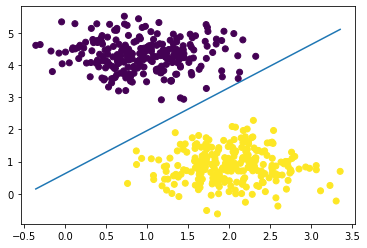

In [60]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.plot(xs, (xs * w[0] + w[2]) / - w[1])

###Just-In-Time compilation for improved efficiency

In [61]:
from jax  import jit

loss_grad = jit(grad(loss))

#Gradients

In [68]:
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random

key = random.PRNGKey(0)

### Starting with `grad`

You can differentiate a function with `grad`:

In [65]:
grad_tanh = grad(jnp.tanh)
print(grad_tanh(2.0))

0.070650816


`grad` takes a function and returns a function. If you have a Python function `f` that evaluates the mathematical function $f$, then `grad(f)` is a Python function that evaluates the mathematical function $\nabla f$. That means `grad(f)(x)` represents the value $\nabla f(x)$.

Since `grad` operates on functions, you can apply it to its own output to differentiate as many times as you like:

In [66]:
print(grad(grad(jnp.tanh))(2.0))
print(grad(grad(grad(jnp.tanh)))(2.0))

-0.13621868
0.25265405


Let's look at computing gradients with `grad` in a linear logistic regression model. First, the setup:

In [69]:
def sigmoid(x):
    return 0.5 * (jnp.tanh(x / 2) + 1)

# Outputs probability of a label being true.
def predict(W, b, inputs):
    return sigmoid(jnp.dot(inputs, W) + b)

# Build a toy dataset.
inputs = jnp.array([[0.52, 1.12,  0.77],
                   [0.88, -1.08, 0.15],
                   [0.52, 0.06, -1.30],
                   [0.74, -2.49, 1.39]])
targets = jnp.array([True, True, False, True])

# Training loss is the negative log-likelihood of the training examples.
def loss(W, b):
    preds = predict(W, b, inputs)
    label_probs = preds * targets + (1 - preds) * (1 - targets)
    return -jnp.sum(jnp.log(label_probs))

# Initialize random model coefficients
key, W_key, b_key = random.split(key, 3)
W = random.normal(W_key, (3,))
b = random.normal(b_key, ())

Use the `grad` function with its `argnums` argument to differentiate a function with respect to positional arguments.

In [70]:
# Differentiate `loss` with respect to the first positional argument:
W_grad = grad(loss, argnums=0)(W, b)
print('W_grad', W_grad)

# Since argnums=0 is the default, this does the same thing:
W_grad = grad(loss)(W, b)
print('W_grad', W_grad)

# But we can choose different values too, and drop the keyword:
b_grad = grad(loss, 1)(W, b)
print('b_grad', b_grad)

# Including tuple values
W_grad, b_grad = grad(loss, (0, 1))(W, b)
print('W_grad', W_grad)
print('b_grad', b_grad)

W_grad [-0.16965583 -0.8774644  -1.4901346 ]
W_grad [-0.16965583 -0.8774644  -1.4901346 ]
b_grad -0.29227245
W_grad [-0.16965583 -0.8774644  -1.4901346 ]
b_grad -0.29227245


This `grad` API has a direct correspondence to the excellent notation in Spivak's classic *Calculus on Manifolds* (1965), also used in Sussman and Wisdom's [*Structure and Interpretation of Classical Mechanics*](http://mitpress.mit.edu/sites/default/files/titles/content/sicm_edition_2/book.html) (2015) and their [*Functional Differential Geometry*](https://mitpress.mit.edu/books/functional-differential-geometry) (2013). Both books are open-access. See in particular the "Prologue" section of *Functional Differential Geometry* for a defense of this notation.

Essentially, when using the `argnums` argument, if `f` is a Python function for evaluating the mathematical function $f$, then the Python expression `grad(f, i)` evaluates to a Python function for evaluating $\partial_i f$.

### Differentiating with respect to nested lists, tuples, and dicts

Differentiating with respect to standard Python containers just works, so use tuples, lists, and dicts (and arbitrary nesting) however you like.

In [ ]:
def loss2(params_dict):
    preds = predict(params_dict['W'], params_dict['b'], inputs)
    label_probs = preds * targets + (1 - preds) * (1 - targets)
    return -jnp.sum(jnp.log(label_probs))

print(grad(loss2)({'W': W, 'b': b}))

{'W': DeviceArray([-0.16965583, -0.8774647 , -1.4901344 ], dtype=float32), 'b': DeviceArray(-0.29227248, dtype=float32)}


You can [register your own container types](https://github.com/google/jax/issues/446#issuecomment-467105048) to work with not just `grad` but all the JAX transformations (`jit`, `vmap`, etc.).

### Evaluate a function and its gradient using `value_and_grad`

Another convenient function is `value_and_grad` for efficiently computing both a function's value as well as its gradient's value:

In [ ]:
from jax import value_and_grad
loss_value, Wb_grad = value_and_grad(loss, (0, 1))(W, b)
print('loss value', loss_value)
print('loss value', loss(W, b))

loss value 3.051939
loss value 3.051939


### Checking against numerical differences

A great thing about derivatives is that they're straightforward to check with finite differences:

In [ ]:
# Set a step size for finite differences calculations
eps = 1e-4

# Check b_grad with scalar finite differences
b_grad_numerical = (loss(W, b + eps / 2.) - loss(W, b - eps / 2.)) / eps
print('b_grad_numerical', b_grad_numerical)
print('b_grad_autodiff', grad(loss, 1)(W, b))

# Check W_grad with finite differences in a random direction
key, subkey = random.split(key)
vec = random.normal(subkey, W.shape)
unitvec = vec / jnp.sqrt(jnp.vdot(vec, vec))
W_grad_numerical = (loss(W + eps / 2. * unitvec, b) - loss(W - eps / 2. * unitvec, b)) / eps
print('W_dirderiv_numerical', W_grad_numerical)
print('W_dirderiv_autodiff', jnp.vdot(grad(loss)(W, b), unitvec))

b_grad_numerical -0.29563904
b_grad_autodiff -0.29227248
W_dirderiv_numerical -0.19788742
W_dirderiv_autodiff -0.19909099


JAX provides a simple convenience function that does essentially the same thing, but checks up to any order of differentiation that you like:

In [ ]:
from jax.test_util import check_grads
check_grads(loss, (W, b), order=2)  # check up to 2nd order derivatives

### Higher-order derivatives

JAX's autodiff makes it easy to compute higher-order derivatives, because the functions that compute derivatives are themselves differentiable. Thus, higher-order derivatives are as easy as stacking transformations.

We illustrate this in the single-variable case:

The derivative of $f(x) = x^3 + 2x^2 - 3x + 1$ can be computed as:

In [ ]:
import jax

f = lambda x: x**3 + 2*x**2 - 3*x + 1

dfdx = jax.grad(f)

The higher-order derivatives of $f$ are:

$$
\begin{array}{l}
f'(x) = 3x^2 + 4x -3\\
f''(x) = 6x + 4\\
f'''(x) = 6\\
f^{iv}(x) = 0
\end{array}
$$

Computing any of these in JAX is as easy as chaining the `grad` function:

In [ ]:
d2fdx = jax.grad(dfdx)
d3fdx = jax.grad(d2fdx)
d4fdx = jax.grad(d3fdx)

Evaluating the above in $x=1$ would give us:

$$
\begin{array}{l}
f'(1) = 4\\
f''(1) = 10\\
f'''(1) = 6\\
f^{iv}(1) = 0
\end{array}
$$

Using JAX:

In [ ]:
print(dfdx(1.))
print(d2fdx(1.))
print(d3fdx(1.))
print(d4fdx(1.))

4.0
10.0
6.0
0.0


In the multivariable case, higher-order derivatives are more complicated. The second-order derivative of a function is represented by its [Hessian matrix](https://en.wikipedia.org/wiki/Hessian_matrix), defined according to

$$(\mathbf{H}f)_{i,j} = \frac{\partial^2 f}{\partial_i\partial_j}.$$

The Hessian of a real-valued function of several variables, $f: \mathbb R^n\to\mathbb R$, can be identified with the Jacobian of its gradient. JAX provides two transformations for computing the Jacobian of a function, `jax.jacfwd` and `jax.jacrev`, corresponding to forward- and reverse-mode autodiff. They give the same answer, but one can be more efficient than the other in different circumstances – see the [video about autodiff](https://www.youtube.com/watch?v=wG_nF1awSSY) linked above for an explanation.

In [ ]:
def hessian(f):
  return jax.jacfwd(jax.grad(f))

Let's double check this is correct on the dot-product $f: \mathbf{x} \mapsto \mathbf{x} ^\top \mathbf{x}$.

if $i=j$, $\frac{\partial^2 f}{\partial_i\partial_j}(\mathbf{x}) = 2$. Otherwise, $\frac{\partial^2 f}{\partial_i\partial_j}(\mathbf{x}) = 0$.

In [ ]:
import jax.numpy as jnp

def f(x):
  return jnp.dot(x, x)

hessian(f)(jnp.array([1., 2., 3.]))

DeviceArray([[2., 0., 0.],
             [0., 2., 0.],
             [0., 0., 2.]], dtype=float32)

Often, however, we aren't interested in computing the full Hessian itself, and doing so can be very inefficient. [The Autodiff Cookbook](https://jax.readthedocs.io/en/latest/notebooks/autodiff_cookbook.html) explains some tricks, like the Hessian-vector product, that allow to use it without materialising the whole matrix.

If you plan to work with higher-order derivatives in JAX, we strongly recommend reading the Autodiff Cookbook.

### Stopping gradients

Auto-diff enables automatic computation of the gradient of a function with respect to its inputs. Sometimes, however, we might want some additional control: for instance, we might want to avoid back-propagating gradients through some subset of the computational graph.

Consider for instance the TD(0) ([temporal difference](https://en.wikipedia.org/wiki/Temporal_difference_learning)) reinforcement learning update. This is used to learn to estimate the *value* of a state in an environment from experience of interacting with the environment. Let's assume the value estimate $v_{\theta}(s_{t-1}$) in a state $s_{t-1}$ is parameterised by a linear function.

In [ ]:
# Value function and initial parameters
value_fn = lambda theta, state: jnp.dot(theta, state)
theta = jnp.array([0.1, -0.1, 0.])

Consider a transition from a state $s_{t-1}$ to a state $s_t$ during which we observed the reward $r_t$

In [ ]:
# An example transition.
s_tm1 = jnp.array([1., 2., -1.])
r_t = jnp.array(1.)
s_t = jnp.array([2., 1., 0.])

The TD(0) update to the network parameters is:

$$
\Delta \theta = (r_t + v_{\theta}(s_t) - v_{\theta}(s_{t-1})) \nabla v_{\theta}(s_{t-1})
$$

This update is not the gradient of any loss function.

However, it can be **written** as the gradient of the pseudo loss function

$$
L(\theta) = [r_t + v_{\theta}(s_t) - v_{\theta}(s_{t-1})]^2
$$

if the dependency of the target $r_t + v_{\theta}(s_t)$ on the parameter $\theta$ is ignored.

How can we implement this in JAX? If we write the pseudo loss naively we get:

In [ ]:
def td_loss(theta, s_tm1, r_t, s_t):
  v_tm1 = value_fn(theta, s_tm1)
  target = r_t + value_fn(theta, s_t)
  return (target - v_tm1) ** 2

td_update = jax.grad(td_loss)
delta_theta = td_update(theta, s_tm1, r_t, s_t)

delta_theta

DeviceArray([ 2.4, -2.4,  2.4], dtype=float32)

But `td_update` will **not** compute a TD(0) update, because the gradient computation will include the dependency of `target` on $\theta$.

We can use `jax.lax.stop_gradient` to force JAX to ignore the dependency of the target on $\theta$:

In [ ]:
def td_loss(theta, s_tm1, r_t, s_t):
  v_tm1 = value_fn(theta, s_tm1)
  target = r_t + value_fn(theta, s_t)
  return (jax.lax.stop_gradient(target) - v_tm1) ** 2

td_update = jax.grad(td_loss)
delta_theta = td_update(theta, s_tm1, r_t, s_t)

delta_theta

DeviceArray([-2.4, -4.8,  2.4], dtype=float32)

This will treat `target` as if it did **not** depend on the parameters $\theta$ and compute the correct update to the parameters.

The `jax.lax.stop_gradient` may also be useful in other settings, for instance if you want the gradient from some loss to only affect a subset of the parameters of the neural network (because, for instance, the other parameters are trained using a different loss).

### Straight-through estimator using `stop_gradient`

The straight-through estimator is a trick for defining a 'gradient' of a function that is otherwise non-differentiable. Given a non-differentiable function $f : \mathbb{R}^n \to \mathbb{R}^n$ that is used as part of a larger function that we wish to find a gradient of, we simply pretend during the backward pass that $f$ is the identity function. This can be implemented neatly using `jax.lax.stop_gradient`:

In [ ]:
def f(x):
  return jnp.round(x)  # non-differentiable

def straight_through_f(x):
  # Create an exactly-zero expression with Sterbenz lemma that has
  # an exactly-one gradient.
  zero = x - jax.lax.stop_gradient(x)
  return zero + jax.lax.stop_gradient(f(x))

print("f(x): ", f(3.2))
print("straight_through_f(x):", straight_through_f(3.2))

print("grad(f)(x):", jax.grad(f)(3.2))
print("grad(straight_through_f)(x):", jax.grad(straight_through_f)(3.2))

f(x):  3.0
straight_through_f(x): 3.0
grad(f)(x): 0.0
grad(straight_through_f)(x): 1.0


### Hessian-vector products with `grad`-of-`grad`

One thing we can do with higher-order `grad` is build a Hessian-vector product function. (Later on we'll write an even more efficient implementation that mixes both forward- and reverse-mode, but this one will use pure reverse-mode.)

A Hessian-vector product function can be useful in a [truncated Newton Conjugate-Gradient algorithm](https://en.wikipedia.org/wiki/Truncated_Newton_method) for minimizing smooth convex functions, or for studying the curvature of neural network training objectives (e.g. [1](https://arxiv.org/abs/1406.2572), [2](https://arxiv.org/abs/1811.07062), [3](https://arxiv.org/abs/1706.04454), [4](https://arxiv.org/abs/1802.03451)).

For a scalar-valued function $f : \mathbb{R}^n \to \mathbb{R}$ with continuous second derivatives (so that the Hessian matrix is symmetric), the Hessian at a point $x \in \mathbb{R}^n$ is written as $\partial^2 f(x)$. A Hessian-vector product function is then able to evaluate

$\qquad v \mapsto \partial^2 f(x) \cdot v$

for any $v \in \mathbb{R}^n$.

The trick is not to instantiate the full Hessian matrix: if $n$ is large, perhaps in the millions or billions in the context of neural networks, then that might be impossible to store.

Luckily, `grad` already gives us a way to write an efficient Hessian-vector product function. We just have to use the identity

$\qquad \partial^2 f (x) v = \partial [x \mapsto \partial f(x) \cdot v] = \partial g(x)$,

where $g(x) = \partial f(x) \cdot v$ is a new scalar-valued function that dots the gradient of $f$ at $x$ with the vector $v$. Notice that we're only ever differentiating scalar-valued functions of vector-valued arguments, which is exactly where we know `grad` is efficient.

In JAX code, we can just write this:

In [ ]:
def hvp(f, x, v):
    return grad(lambda x: jnp.vdot(grad(f)(x), v))(x)

This example shows that you can freely use lexical closure, and JAX will never get perturbed or confused.

We'll check this implementation a few cells down, once we see how to compute dense Hessian matrices. We'll also write an even better version that uses both forward-mode and reverse-mode.

### Jacobians and Hessians using `jacfwd` and `jacrev`

You can compute full Jacobian matrices using the `jacfwd` and `jacrev` functions:

In [ ]:
from jax import jacfwd, jacrev

# Isolate the function from the weight matrix to the predictions
f = lambda W: predict(W, b, inputs)

J = jacfwd(f)(W)
print("jacfwd result, with shape", J.shape)
print(J)

J = jacrev(f)(W)
print("jacrev result, with shape", J.shape)
print(J)

jacfwd result, with shape (4, 3)
[[ 0.05981756  0.12883782  0.088576  ]
 [ 0.04015914 -0.04928622  0.00684531]
 [ 0.12188289  0.01406341 -0.3047072 ]
 [ 0.00140428 -0.00472522  0.00263777]]
jacrev result, with shape (4, 3)
[[ 0.05981756  0.12883782  0.088576  ]
 [ 0.04015914 -0.04928622  0.00684531]
 [ 0.12188289  0.01406341 -0.3047072 ]
 [ 0.00140428 -0.00472522  0.00263777]]


These two functions compute the same values (up to machine numerics), but differ in their implementation: `jacfwd` uses forward-mode automatic differentiation, which is more efficient for "tall" Jacobian matrices, while `jacrev` uses reverse-mode, which is more efficient for "wide" Jacobian matrices. For matrices that are near-square, `jacfwd` probably has an edge over `jacrev`.

You can also use `jacfwd` and `jacrev` with container types:

In [ ]:
def predict_dict(params, inputs):
    return predict(params['W'], params['b'], inputs)

J_dict = jacrev(predict_dict)({'W': W, 'b': b}, inputs)
for k, v in J_dict.items():
    print("Jacobian from {} to logits is".format(k))
    print(v)

Jacobian from W to logits is
[[ 0.05981756  0.12883782  0.088576  ]
 [ 0.04015914 -0.04928622  0.00684531]
 [ 0.12188289  0.01406341 -0.3047072 ]
 [ 0.00140428 -0.00472522  0.00263777]]
Jacobian from b to logits is
[0.11503378 0.04563539 0.23439017 0.00189768]


For more details on forward- and reverse-mode, as well as how to implement `jacfwd` and `jacrev` as efficiently as possible, read on!

Using a composition of two of these functions gives us a way to compute dense Hessian matrices:

In [ ]:
def hessian(f):
    return jacfwd(jacrev(f))

H = hessian(f)(W)
print("hessian, with shape", H.shape)
print(H)

hessian, with shape (4, 3, 3)
[[[ 0.02285465  0.0492254   0.03384246]
  [ 0.0492254   0.10602394  0.07289147]
  [ 0.03384246  0.07289146  0.05011288]]

 [[-0.03195214  0.03921399 -0.00544639]
  [ 0.03921399 -0.04812626  0.0066842 ]
  [-0.00544639  0.0066842  -0.00092836]]

 [[-0.01583708 -0.00182736  0.03959271]
  [-0.00182736 -0.00021085  0.00456839]
  [ 0.03959271  0.00456839 -0.09898177]]

 [[-0.00103522  0.00348336 -0.00194453]
  [ 0.00348336 -0.01172105  0.00654308]
  [-0.00194453  0.00654308 -0.00365256]]]


This shape makes sense: if we start with a function $f : \mathbb{R}^n \to \mathbb{R}^m$, then at a point $x \in \mathbb{R}^n$ we expect to get the shapes

* $f(x) \in \mathbb{R}^m$, the value of $f$ at $x$,
* $\partial f(x) \in \mathbb{R}^{m \times n}$, the Jacobian matrix at $x$,
* $\partial^2 f(x) \in \mathbb{R}^{m \times n \times n}$, the Hessian at $x$,

and so on.

To implement `hessian`, we could have used `jacfwd(jacrev(f))` or `jacrev(jacfwd(f))` or any other composition of the two. But forward-over-reverse is typically the most efficient. That's because in the inner Jacobian computation we're often differentiating a function wide Jacobian (maybe like a loss function $f : \mathbb{R}^n \to \mathbb{R}$), while in the outer Jacobian computation we're differentiating a function with a square Jacobian (since $\nabla f : \mathbb{R}^n \to \mathbb{R}^n$), which is where forward-mode wins out.